## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a fully-connected feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255.
It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next week when we will be implementing the same using Tensorflow.

In [ ]:
import numpy as np
from keras.datasets import mnist
import random

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.

In [ ]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

## 1. Write the code for Sigmoid Function.

In [ ]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

# 2. The Network

We will making a class called Network which has certain functions inside it. You need to code only the first 3. Rest are done for you.  There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.

In [ ]:
class Network(object):
    def __init__(self,sizes):
        self.num_layers=len(sizes)
        self.sizes=sizes
        self.biases=[np.random.randn(y,1) for y in sizes[1:]]
        self.weights= [np.random.randn(y,x) for y,x in zip(sizes[1:],sizes[:-1])]

# stop_zone 1. Comment out all the code below. Select all rows below. Click Ctrl + /.
# Include the show function given below above this comment area inside the class.
# Run this cell and then run the code with stop_zone 1 written below.
# After this testing, don't forget tto remove the comments. Same, select all, Ctrl+/.

    def forwardpropagation(self,a):
        for b,w in zip(self.biases, self.weights):
            a=sigmoid(np.dot(w,a)+b)
            # print(a.shape)
        return a

# stop_zone 2. Comment out all the code below. Don't comment out the __init__ method else you will get error.
# Remove comment from print(a.shape) line above. Run this cell. And run the code with stop_zone 2 written below.


    def backpropagation(self,x,y):

        # nothing to do in this 3 lines.
        y_t = np.zeros((len(y), 10))
        y_t[np.arange(len(y)), y] = 1
        y_t= y_t.T

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer

        # write the same forward propagation code here but while doing so store the a's.
        for w,b in zip(self.weights,self.biases):
            activation= sigmoid(np.dot(w,activation)+b)
            activation_list.append(activation)

        delta= (activation_list[-1]-y_t)

        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1]=delta
        nabla_w[-1]= np.dot(delta,activation_list[-2].T)

        # print("{} {}".format(nabla_b[-1].shape,nabla_w[-1].shape) )
#stop_zone 3 : remove comment from the print statement just above and run the cell for stop_zone3.
# don't forget commenting out.
        # step 3 : calculation of delta for hidden layers

        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])
            delta= np.dot(self.weights[-j+1].T,delta)*sig_der

            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]=delta
            nabla_w[-j]=np.dot(delta,activation_list[-j-1].T)

#stop_zone 4 : Run the cell for stop_zone 4.
        return (nabla_b,nabla_w)

    # the functions below are complete. If you are fine till stop_zone 4, you can run
    # this whole cell and train, test the data by running the last cell of the notebook.
    # You may need to wait for around 10 minutes to see the test predictions.
    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]


    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+ mini_batch_size] for k in range(0,n_train,mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,lr)

            self.predict(train_data)
            print("Epoch {0} completed.".format(i+1))

    def predict(self,test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)),y) for x,y in test_data]
        # returns the index of that output neuron which has highest activation

        num= sum(int (x==y) for x,y in test_results)
        print ("{0}/{1} classified correctly.".format(num,len(test_data)))



In [ ]:
# stop_zone 1

def show(self):
  for bias in self.biases:
      print(bias.shape)
  for weight in self.weights:
      print(weight.shape)

# Copy this show function from here. Paste it inside that Network Class.
# Comment out the show function here. Run this cell.

net=Network([784,128,64,10])
net.show()

# The desired output is :
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [ ]:
# stop_zone 2
# to use this, make sure your data is loaded. Run this cell.
net=Network([784,128,64,10])
print(train_X[0])
net.forwardpropagation(train_X[0])

# The desired output is :
# (784, 1)
# (128, 1)
# (64, 1)
# (10, 1)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

In [ ]:
# stop_zone 3
net=Network([784,128,64,10])
net.backpropagation(train_X[0],train_y[0])

# Desired output : (10,1) (10,64)

In [ ]:
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

# Desired output:
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [ ]:
net=Network([784,256,128,64,10])
net.SGD(train_data=train_data,epochs=20,mini_batch_size=20,lr=0.01)
print("Test data:")
net.predict(test_data)

1953/10000 classified correctly.
Epoch 0 completed, training accuracy None.
3242/10000 classified correctly.
Epoch 1 completed, training accuracy None.
4162/10000 classified correctly.
Epoch 2 completed, training accuracy None.
4848/10000 classified correctly.
Epoch 3 completed, training accuracy None.
5361/10000 classified correctly.
Epoch 4 completed, training accuracy None.
5738/10000 classified correctly.
Epoch 5 completed, training accuracy None.
6065/10000 classified correctly.
Epoch 6 completed, training accuracy None.
6346/10000 classified correctly.
Epoch 7 completed, training accuracy None.
6570/10000 classified correctly.
Epoch 8 completed, training accuracy None.
6757/10000 classified correctly.
Epoch 9 completed, training accuracy None.
618/1000 classified correctly.


#Question 2 :
## Stochastic Gradient Descent
Implement logistic regression using "Stochastic gradient descent" and use iris-dataset as training data.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import math
import random
# pre load sklearn iris datasets
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris.data
Y = iris.target

dataset = []

target_label = 0 # choose the target label of flower type
for index, x in enumerate(X):
    transform_label = None
    if Y[index] == target_label:
        transform_label = 1 # is the type
    else:
        transform_label = 0 # is not the type
    x = [x[0], x[2]]
    dataset.append((x,transform_label))

dataset = np.array(dataset)

print(dataset)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sgd(dataset, w):
    #run sgd randomly
    index = random.randint(0, len(dataset) - 1)
    x, y = dataset[index]
    x = np.array(x)
    error = sigmoid(w.T.dot(x))
    g = (error - y) * x
    return g

def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        total_cost += abs(y - error)
    return total_cost

def logistic_regression(dataset):
    w = np.zeros(2)
    limit = 1500 #update times
    eta = 0.1 #update rate
    costs = []
    for i in range(limit):
        current_cost = cost(dataset, w)
        if i % 100 == 0:
            print ("epoch = " + str(i/100 + 1) + ": current_cost = ", current_cost)
        costs.append(current_cost)
        w = w - eta * sgd(dataset, w)
        eta = eta * 0.98 #decrease update rate
    plt.plot(range(limit), costs)
    plt.show()
    return w,(limit, costs)

def main():
    #execute
    w = logistic_regression(dataset)
    #draw
    ps = [v[0] for v in dataset]
    label = [v[1] for v in dataset]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    #plot via label
    tpx=[]
    for index, label_value in enumerate(label):
        px=ps[index][0]
        py=ps[index][1]
        tpx.append(px)
        if label_value == 1:
            ax1.scatter(px, py, c='b', marker="o", label='O')
        else:
            ax1.scatter(px, py, c='r', marker="x", label='X')

    l = np.linspace(min(tpx),max(tpx))
    a,b = (-w[0][0]/w[0][1], w[0][0])
    ax1.plot(l, a*l + b, 'g-')
    #plt.legend(loc='upper left');
    plt.show()

    limit = w[1][0]
    costs = w[1][1]
    w = w[0]

    # calculate score
    predicted_Y=[]
    answer_Y=[]
    for X,Y in dataset:
        answer_Y.append(Y)
        predicted_Y.append(sigmoid(w.T.dot(X)))
    predicted_Y = np.asarray(predicted_Y)
    predicted_Y = predicted_Y > 0.5
    #print(answer_Y)
    #print(predicted_Y)
    print ("Accuracy: ",str(accuracy_score(answer_Y, predicted_Y)*100)[:5],"%")

if __name__ == '__main__':
    main()


# Question 3 :
## Implement linear regression using "mini-batch" gradient descent

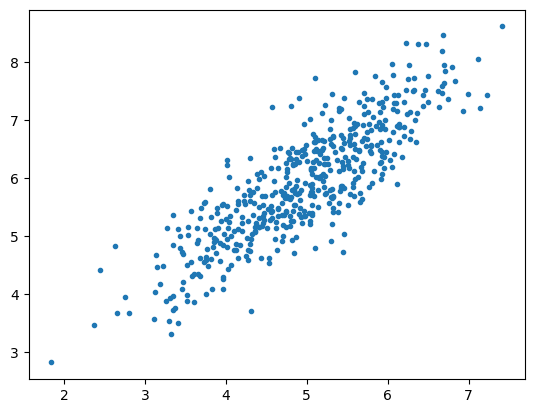

Bias =  [1.15419587]
Coefficients =  []


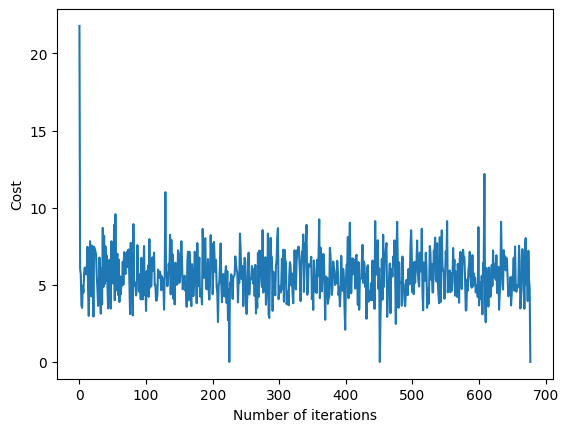

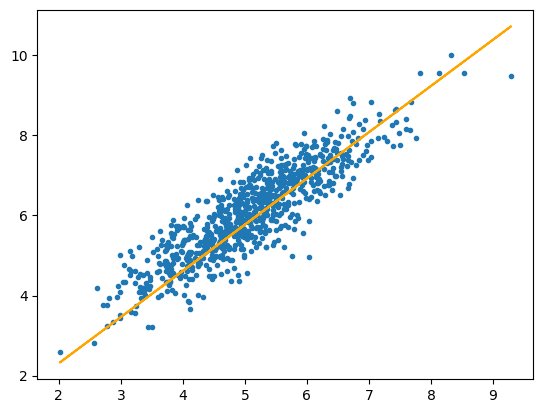

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)

# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker='.')
plt.show()

# train-test-split
# data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.90
split = int(split_factor * data.shape[0])

X_train = data[:split, :-1].reshape((-1, 1))
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1].reshape((-1, 1))
y_test = data[split:, -1].reshape((-1, 1))



# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions


def hypothesis(X, theta):
	return np.dot(X, theta)

# function to compute gradient of error function w.r.t. theta


def gradient(X, y, theta):
	h = hypothesis(X, theta)
	grad = np.dot(X.transpose(), (h - y))
	return grad

# function to compute the error for current values of theta


def cost(X, y, theta):
	h = hypothesis(X, theta)
	J = np.dot((h - y).transpose(), (h - y))
	J /= 2
	return J[0]

# function to create a list containing mini-batches


def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))
	np.random.shuffle(data)
	n_minibatches = data.shape[0] // batch_size
	i = 0

	for i in range(n_minibatches + 1):
		mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	if data.shape[0] % batch_size != 0:
		mini_batch = data[i * batch_size:data.shape[0]]
		X_mini = mini_batch[:, :-1]
		Y_mini = mini_batch[:, -1].reshape((-1, 1))
		mini_batches.append((X_mini, Y_mini))
	return mini_batches

# function to perform mini-batch gradient descent


def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
	theta = np.zeros((X.shape[1], 1))
	error_list = []
	max_iters = 3
	for itr in range(max_iters):
		mini_batches = create_mini_batches(X, y, batch_size)
		for mini_batch in mini_batches:
			X_mini, y_mini = mini_batch
			theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
			error_list.append(cost(X_mini, y_mini, theta))

	return theta, error_list


theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


# predicting output for X_test
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 0], y_test[:, ], marker='.')
plt.plot(X_test[:, 0], y_pred, color='orange')
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])

